In [1]:
import os 
#data_location = input("Enter Path Location of data")
os.chdir("/home/mitchell/Documents/masters/masters/scripts/")
import galaxy_pairs
import cmb
import numpy as np
import scipy as sp
import astropy as ap
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.constants as const
from astropy import constants as ap_const
import scipy.ndimage 
import PIL
from mpdaf.obj import Image,WCS
import sptpol_software as sps
from astropy.io import fits
from astropy.cosmology import Planck15
from astropy import units as u
import scipy.spatial.distance as dist
print(Planck15)
cosmo= Planck15
cwd = os.getcwd()
print(cwd)
from sptpol_software.util.tools import stat
from sptpol_software.observation import *
import sptpol_software.observation as obs
import sptpol_software as sps
import sptpol_software.observation.sky
from sptpol_software.util import files

pywtl packages could not be imported.  This may break plotting code.
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
/home/mitchell/Documents/masters/masters/scripts


In [2]:
from astropy.nddata import Cutout2D, block_replicate

In [4]:
size_of_array = input("Enter the sie of the Cutouts: ")

Enter the sie of the Cutouts:  100


In [5]:
# size_of_array = int(input("Enter the size of the array: "))
array_1= np.zeros(shape = (size_of_array,size_of_array))
array_2 = np.zeros(shape = (size_of_array,size_of_array))


In [6]:
source_loc_1 = np.array([np.random.randint(0,len(array_1)-10),np.random.randint(0,len(array_1)-10)])
source_loc_2 = np.array([np.random.randint(0,len(array_2)-10),np.random.randint(0,len(array_2)-10)])
print(source_loc_1)
# print(source_loc_2)

[47 57]


In [7]:
x1 = source_loc_1[0]
print("x1 = " + str(x1))
print("-x1 = " + str(len(array_1)-x1))
y1 = source_loc_1[1]
print("y1 = " + str(y1))
print("-y1 = " + str(len(array_1)-y1))

x2 = source_loc_2[0]
print("x2 = " + str(x2))
print("-x2 = " + str(len(array_1)-x2))

y2 = source_loc_2[1]
print("y2 = " + str(y2))
print("-y2 = " + str(len(array_1)-y2))

# source = makeGaussian(size_of_source,size_of_source)
# array[x1:x1+source.shape[0], y1:y1+source.shape[1]] = source
# array[-x1-source.shape[0]:-x1, -y1-source.shape[1]:-y1] = source


x1 = 47
-x1 = 53
y1 = 57
-y1 = 43
x2 = 82
-x2 = 18
y2 = 89
-y2 = 11


In [8]:
# plt.imshow(array)

In [9]:
# source_x1 = x1+(source.shape[0]/2)
# source_y1 = y1+(source.shape[1]/2)
# source_x2 = -x1-(source.shape[0]/2)
# source_y2 = -y1+(source.shape[1]/2)

angle_1 = np.degrees(np.arctan((float(len(array_1)-y1)-float(y1))/(float(len(array_1)-x1)-float(x1))))
angle_2 =  np.degrees(np.arctan((float(len(array_2)-y2)-float(y2))/(float(len(array_2)-x2)-float(x2))))

In [10]:
print(angle_1)
print(angle_2)

-66.80140948635182
50.63068275763526


In [11]:
array_1[source_loc_1[0]][source_loc_1[1]] = 1
array_1[-source_loc_1[0]][-source_loc_1[1]] = 1
gauss_array_1 = sp.ndimage.gaussian_filter(array_1,2) + np.random.normal(scale=0.01,size=np.shape(array_1))
array_2[source_loc_2[0]][source_loc_2[1]] = 1
array_2[-source_loc_2[0]][-source_loc_2[1]] = 1
gauss_array_2 = sp.ndimage.gaussian_filter(array_2,2) + np.random.normal(scale=0.01,size=np.shape(array_2))

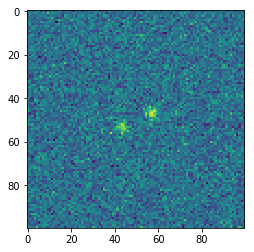

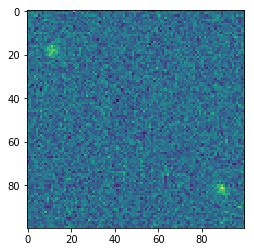

In [12]:
plt.imshow(gauss_array_1)
plt.show()
plt.imshow(gauss_array_2)
plt.show()

In [13]:
rot_array_1 =  sp.ndimage.rotate(gauss_array_1, 90-angle_1, reshape=True)
rot_array_2 =  sp.ndimage.rotate(gauss_array_2, 90-angle_2, reshape=True)

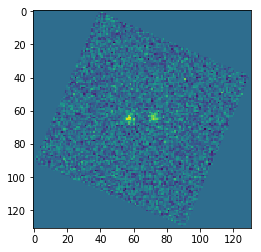

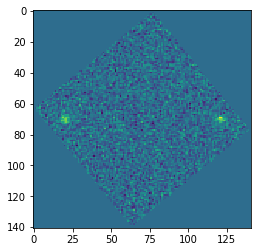

In [14]:
plt.imshow(rot_array_1)
plt.show()
plt.imshow(rot_array_2)
plt.show()

In [15]:
sep_1 = np.sqrt(((len(array_1)-x1)-x1)**2 + ((len(array_1)-y1) - y1)**2)
print(sep_1)
scale_fac_1 = 80.0/sep_1
sep_2 = np.sqrt(((len(array_2)-x2)-x2)**2 + ((len(array_2)-y2) - y2)**2)
print(sep_2)
scale_fac_2 = 80.0/sep_2


15.231546211727817
100.89598604503551


In [16]:
print(scale_fac_1)
print(scale_fac_2)

5.252257314388902
0.7928957645975285


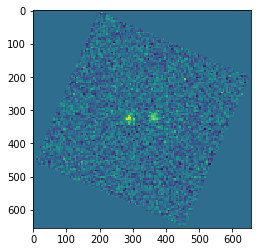

In [17]:
# rescaled_array_1 = sp.ndimage.zoom(rot_array_1,scale_fac_1)
rescaled_array_1 = block_replicate(rot_array_1,scale_fac_1)
# plt.show()
# test = np.pad(rescaled_array_1,30,mode="constant")
# plt.imshow(test)
# plt.show()
plt.imshow(rescaled_array_1)

/home/mitchell/Software/anaconda3/envs/cloud_2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


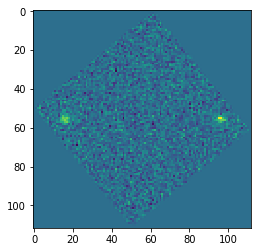

In [18]:
rescaled_array_2 = sp.ndimage.zoom(rot_array_2,scale_fac_2)
plt.imshow(rescaled_array_2)

In [19]:
centre_1 = [len(rescaled_array_1)/2,len(rescaled_array_1)/2]
print(centre_1)
# print(np.shape(rescaled_array_1)/2)
centre_2 = [len(rescaled_array_2)/2,len(rescaled_array_2)/2]
print(centre_2)

[327, 327]
[56, 56]


In [20]:
np.shape(rescaled_array_1)


(655, 655)

In [22]:
np.shape(rescaled_array_2)

(107, 107)

In [27]:
abs(len(rescaled_array_2)-(len(rescaled_array_2)/2 + 70))

33

In [1]:
output_1 = galaxy_pairs.get_subarray(rescaled_array_1,centre_1,70,max_size=140)
output_2 = galaxy_pairs.get_subarray(rescaled_array_2,centre_2,70,max_size=140)

NameError: name 'galaxy_pairs' is not defined

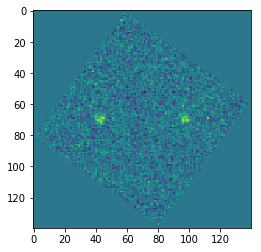

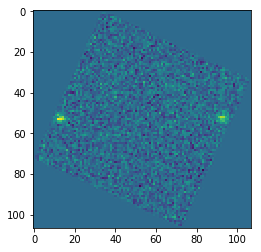

In [24]:
plt.imshow(output_1)
plt.show()
plt.imshow(output_2)
plt.show()

In [25]:
final_output = output_1+output_2
plt.imshow(final_output)

ValueError: operands could not be broadcast together with shapes (140,140) (107,107) 

In [31]:
second_output = np.add(output_1,output_2)
plt.imshow(second_output)

ValueError: operands could not be broadcast together with shapes (86,86) (140,140) 

In [32]:
print(np.shape(output_1))
print(np.shape(output_2))

(86, 86)
(140, 140)


In [42]:
num_pairs = input("Enter the number of pairs to simulate adding together: ")
output = np.zeros(shape = (140,140))
gauss_noise = 2
size_of_array = np.random.randint(30,140)
for i in range(num_pairs):
    array = np.zeros(shape = (size_of_array,size_of_array))
    
    source_loc = np.array([np.random.randint(0,len(array)-10),np.random.randint(0,len(array)-10)])
    
    x1 = source_loc[0]
    y1 = source_loc[1]
    
    if (float(len(array)-x1)-float(x1)) == 0:
        angle = 90
    else:
        angle = np.degrees(np.arctan((float(len(array)-y1)-float(y1))/(float(len(array)-x1)-float(x1))))
    
    array[source_loc[0]][source_loc[1]] = 1
    array[-source_loc[0]][-source_loc[1]] = 1
    
    gauss_array = sp.ndimage.gaussian_filter(array,2) + np.random.normal(scale=gauss_noise,size=np.shape(array))
    
    rot_array =  sp.ndimage.rotate(gauss_array, 90-angle, reshape=True)
    
    sep = np.sqrt(((len(array)-x1)-x1)**2 + ((len(array_1)-y1) - y1)**2)
    if sep <2:
        continue
    scale_fac = 80.0/sep
    
    rescaled_array = sp.ndimage.zoom(rot_array,scale_fac)
    
    centre = [len(rescaled_array)/2,len(rescaled_array)/2]
    
    final_array = galaxy_pairs.get_subarray(rescaled_array,centre,70,max_size=140)
    
    if np.shape(final_array) != np.shape(output):
        continue
    flip_1 = np.fliplr(final_array)
    flip_2 = np.flipud(final_array)
    flip_3 = np.fliplr(flip_2)
    output += (final_array + flip_1 + flip_2 + flip_3)/4
    
    if i%10000 == 0:
        print("Added Pair " + str(i))
        
# output = output/i

Enter the number of pairs to simulate adding together:  400000


Added Pair 10000
Added Pair 20000
Added Pair 30000
Added Pair 40000
Added Pair 50000
Added Pair 60000
Added Pair 70000
Added Pair 80000
Added Pair 90000
Added Pair 100000
Added Pair 110000
Added Pair 120000
Added Pair 130000
Added Pair 140000
Added Pair 150000
Added Pair 160000
Added Pair 170000
Added Pair 180000
Added Pair 200000
Added Pair 220000
Added Pair 230000
Added Pair 240000
Added Pair 250000
Added Pair 270000
Added Pair 280000
Added Pair 290000
Added Pair 300000
Added Pair 310000
Added Pair 330000
Added Pair 340000
Added Pair 350000
Added Pair 360000
Added Pair 370000
Added Pair 380000


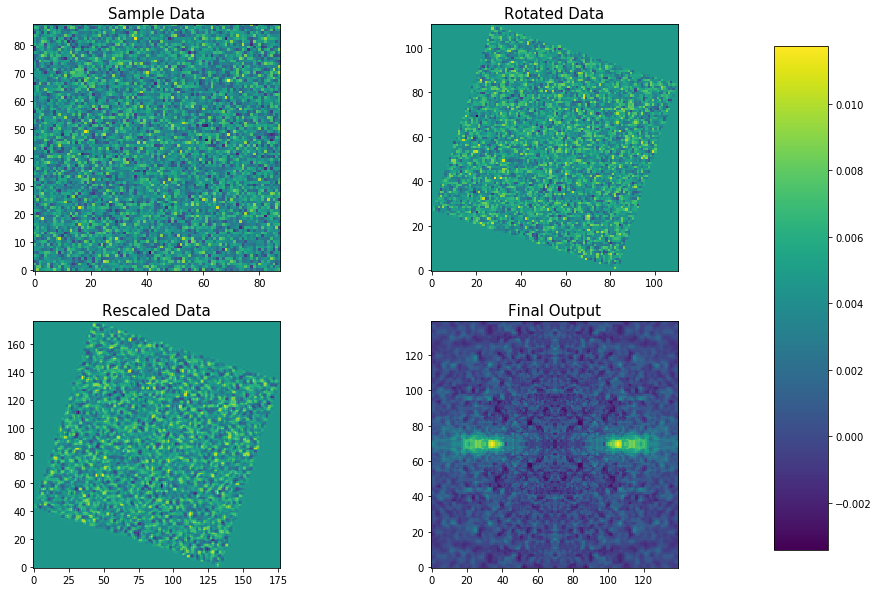

In [52]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
# fig, axes = plt.subplots(nrows=2, ncols=2)


im = plt.imshow(gauss_array, origin='lower', interpolation='nearest')
plt.title("Sample Data",size=15)
# plt.colorbar()

plt.subplot(2, 2, 2)
im = plt.imshow(rot_array, origin='lower', interpolation='nearest')
plt.title("Rotated Data",size=15)
# plt.colorbar()

plt.subplot(2, 2, 3)
im = plt.imshow(rescaled_array, origin='lower', interpolation='nearest')
plt.title("Rescaled Data",size=15)
# plt.colorbar()

plt.subplot(2, 2, 4)
im = plt.imshow(output/i, origin='lower', interpolation='nearest')
plt.title("Final Output",size=15)
# plt.colorbar()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

os.chdir('/home/mitchell/Documents/masters/masters/thesis/Ver_2/figures')
plt.savefig("simulated_stack.png",dpi=1000)

In [33]:
# help(plt.savefig)


Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or file-like object
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember 